# PST DOMÁCÍ ÚLOHA - SKORE KREATIVITY DLE TYPU MOTIVACE

In [1]:
K = 4
L = 7
M = ((K+L)*47) % 11 + 1
print(f'M = {M}')

M = 1


V našem případě budeme pracovat s datasetem č.1

## Úkol 1

##### Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

Importujeme potřebné knihovny

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

Načítame data z csv-souboru a podívíáme se na informace o nich

In [3]:
df = pd.read_csv('data.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    47 non-null     object
dtypes: object(1)
memory usage: 504.0+ bytes


None

,Data
0,1 5.000000 Extrinsic
1,2 5.400000 Extrinsic
2,3 6.100000 Extrinsic
3,4 10.900000 Extrinsic
4,5 11.800000 Extrinsic


Dělame parsing pro vytvoření příslušných slopců

In [4]:
data = []
count = 0

for tmp in df['Data']:
    data.append([])
    tmp = str(tmp).split(' ')
    for x in tmp:
        if x != '':
            data[count].append(x)
    count += 1

digital_data = []
treatment = []
for x in data:
    digital_data.append(float(x[1]))
    treatment.append(x[2])
    
df = df.drop('Data', axis=1)
df['Data'] = digital_data
df['Treatment'] = treatment

In [5]:
display(df.head())
display(df.tail())

,Data,Treatment
0,5.0,Extrinsic
1,5.4,Extrinsic
2,6.1,Extrinsic
3,10.9,Extrinsic
4,11.8,Extrinsic


,Data,Treatment
42,23.100000,Intrinsic
43,24.000000,Intrinsic
44,24.299999,Intrinsic
45,26.700001,Intrinsic
46,29.700001,Intrinsic


Vidíme, že v našem datasetu jsou 2 skupiny dat: vnější a vnitřní. Rozdělíme tedy ho na 2 příslušné datasety

In [6]:
extrinsic = df[df['Treatment'] == 'Extrinsic']
intrinsic = df[df['Treatment'] == 'Intrinsic']

In [7]:
def analyse_dataset(dataset):
    display(dataset.head())
    print(f'Velikost datasetu - {dataset.shape[0]}')

analyse_dataset(extrinsic)
analyse_dataset(intrinsic)

,Data,Treatment
0,5.0,Extrinsic
1,5.4,Extrinsic
2,6.1,Extrinsic
3,10.9,Extrinsic
4,11.8,Extrinsic


Velikost datasetu - 23


,Data,Treatment
23,12.0,Intrinsic
24,12.0,Intrinsic
25,12.9,Intrinsic
26,13.6,Intrinsic
27,16.6,Intrinsic


Velikost datasetu - 24


Ted odhadneme střední hodnotu, rozptyl a medián pro každý vytvořený dataset.

Víme, že odhadem střední hodnoty je výběrový průměr. Použijeme funkci .mean() z Pandas

In [8]:
def mean_value(data):
    return data.mean()

print(f"Odhad střední hodnoty rozdělení Extrinsic - {mean_value(extrinsic['Data'])}")
print(f"Odhad střední hodnoty rozdělení Intrinsic - {mean_value(intrinsic['Data'])}")

Odhad střední hodnoty rozdělení Extrinsic - 15.739130695652173
Odhad střední hodnoty rozdělení Intrinsic - 19.883333333333333


Odhadem rozptylu rozdělení je výběrový rozptyl. Použijeme funkci .var() z Pandas

In [9]:
def variance_value(data):
    return data.var()

print(f"Odhad rozptylu rozdělení Extrinsic - {variance_value(extrinsic['Data'])}")
print(f"Odhad rozptylu rozdělení Intrinsic - {variance_value(intrinsic['Data'])}")

Odhad rozptylu rozdělení Extrinsic - 27.58976481541531
Odhad rozptylu rozdělení Intrinsic - 19.709276144927973


Pro výpočet mediánu každého rozdělení použijeme funkci .median() z Pandas

In [10]:
def median_value(data):
    return data.median()

print(f"Medián rozdělení Extrinsic - {median_value(extrinsic['Data'])}")
print(f"Medián rozptylu rozdělení Intrinsic - {median_value(intrinsic['Data'])}")

Medián rozdělení Extrinsic - 17.200001
Medián rozptylu rozdělení Intrinsic - 20.3999995


## Úkol 2

##### Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce

Píšeme vhodnou funkci pro vykreslení odhad hustoty a zároven distribuční funkce. Pro vykreslení odhadu hustoty použijeme funkci .plot.kde(). Pro vykreselení empirické distribuční funkce použijeme .plot.hist() s nastáveným parametrem cumulative na True.

In [11]:
def approx_plots(data, name):
    print(f'Příslušné vizualizace pro rozdělení {name}')
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    density = data.plot.kde(ax=axs[0], legend=False)
    axs[0].set_title(f'Density Plot {name}')
    axs[0].set_xlabel('Data')
    
    distribution_function = data.plot.hist(cumulative = True, ax=axs[1], density = True, edgecolor='black', legend=False, color='lightblue')
    axs[1].set_title(f'Empirical Distribution Plot {name}')
    axs[1].set_xlabel('Data')

Příslušné vizualizace pro rozdělení Extrinsic


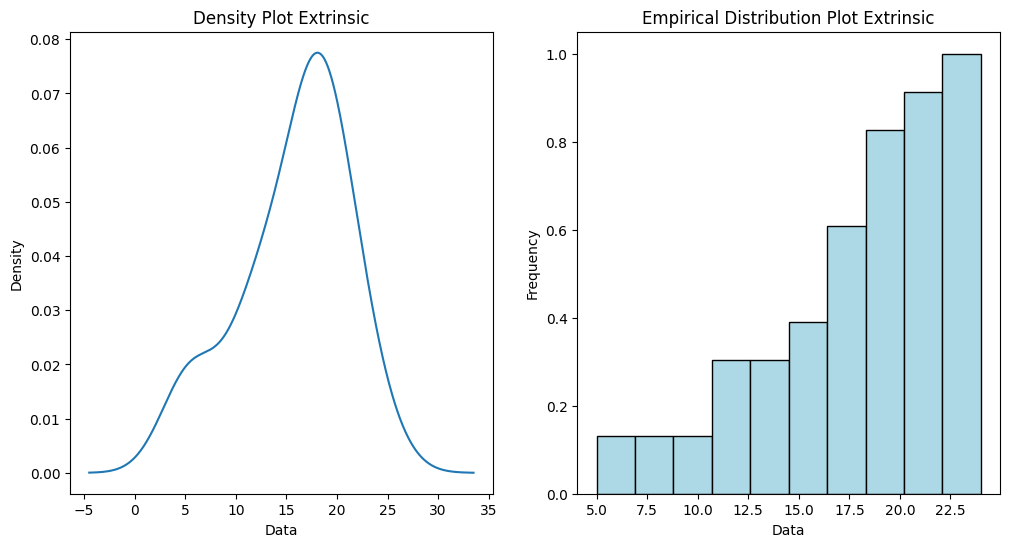

In [12]:
approx_plots(extrinsic, 'Extrinsic')

Příslušné vizualizace pro rozdělení Intrinsic


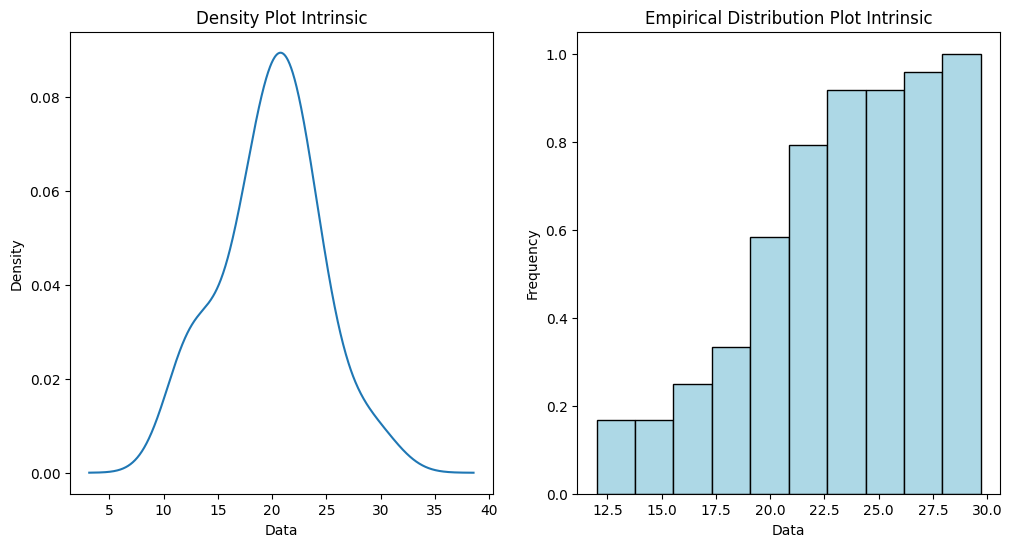

In [13]:
approx_plots(intrinsic, 'Intrinsic')